# Mutli CLass Image Classifier

## Better Result loss minimum and high accuarcy but predicting is not good. so that, we move on VGG

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

Using TensorFlow backend.
c:\users\abhishek negi\.conda\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\abhishek negi\.conda\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\abhishek negi\.conda\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\abhis

In [2]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(4))
model.add(Activation('softmax'))
model.summary()

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam',\
 metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)       

In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_datagen

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen

In [5]:
training_set = train_datagen.flow_from_directory('E:/Parent1', target_size = (224,224),
                                                 batch_size=128,
                                                 class_mode='categorical')
training_set

Found 40 images belonging to 4 classes.


In [6]:
test_set = test_datagen.flow_from_directory('E:/Parent1',
                                            target_size = (224,224),
                                            batch_size =128,
                                            class_mode = 'categorical')
test_set

Found 40 images belonging to 4 classes.


In [7]:
# (5) Train
model.fit(training_set,epochs=2,steps_per_epoch = 250, verbose=1, \
validation_data=test_set, shuffle=True)


Epoch 1/2
250/250 [==============================] - 2616s 10s/step - loss: 0.0441 - accuracy: 0.9851 - val_loss: 1.8605 - val_accuracy: 0.8000
Epoch 2/2
250/250 [==============================] - 2625s 11s/step - loss: 7.8264e-06 - accuracy: 1.0000 - val_loss: 2.4171e-05 - val_accuracy: 1.0000


In [8]:
score = model.evaluate(test_set)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 7s 7s/step
Test Loss: 2.417134601273574e-05
Test accuracy: 1.0


In [9]:
model.save("Multiple Class Image with AlexNet.h5")
print("Saved model to disk")

Saved model to disk


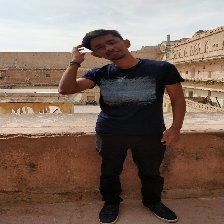

In [10]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\Abhishek Negi\Desktop\IMG-20190620-WA0030.jpg', target_size = (224,224))
test_image

In [11]:
test_image = image.img_to_array(test_image)
test_image

array([[[230., 237., 243.],
        [227., 236., 243.],
        [226., 236., 245.],
        ...,
        [206., 214., 217.],
        [208., 213., 217.],
        [207., 212., 216.]],

       [[226., 237., 241.],
        [223., 236., 242.],
        [223., 238., 245.],
        ...,
        [208., 215., 221.],
        [208., 213., 219.],
        [208., 213., 219.]],

       [[225., 234., 241.],
        [224., 234., 243.],
        [221., 234., 243.],
        ...,
        [210., 218., 221.],
        [209., 214., 218.],
        [209., 214., 218.]],

       ...,

       [[106.,  74.,  61.],
        [114.,  74.,  62.],
        [116.,  77.,  60.],
        ...,
        [120.,  87.,  72.],
        [114.,  81.,  66.],
        [104.,  77.,  68.]],

       [[112.,  80.,  69.],
        [113.,  73.,  61.],
        [116.,  72.,  59.],
        ...,
        [116.,  87.,  71.],
        [118.,  89.,  73.],
        [120.,  96.,  86.]],

       [[103.,  86.,  78.],
        [106.,  79.,  70.],
        [113.,  

In [12]:
test_image = np.expand_dims(test_image, axis = 0)
test_image

array([[[[230., 237., 243.],
         [227., 236., 243.],
         [226., 236., 245.],
         ...,
         [206., 214., 217.],
         [208., 213., 217.],
         [207., 212., 216.]],

        [[226., 237., 241.],
         [223., 236., 242.],
         [223., 238., 245.],
         ...,
         [208., 215., 221.],
         [208., 213., 219.],
         [208., 213., 219.]],

        [[225., 234., 241.],
         [224., 234., 243.],
         [221., 234., 243.],
         ...,
         [210., 218., 221.],
         [209., 214., 218.],
         [209., 214., 218.]],

        ...,

        [[106.,  74.,  61.],
         [114.,  74.,  62.],
         [116.,  77.,  60.],
         ...,
         [120.,  87.,  72.],
         [114.,  81.,  66.],
         [104.,  77.,  68.]],

        [[112.,  80.,  69.],
         [113.,  73.,  61.],
         [116.,  72.,  59.],
         ...,
         [116.,  87.,  71.],
         [118.,  89.,  73.],
         [120.,  96.,  86.]],

        [[103.,  86.,  78.],
       

In [13]:
from keras.models import load_model
model=load_model('Multiple Class Image with AlexNet.h5')
result= model.predict(test_image)
result

array([[0., 0., 1., 0.]], dtype=float32)

In [14]:
training_set.class_indices

{'Abhishek Negi': 0, 'Chennu': 1, 'Dorami': 2, 'Rinki': 3}

In [15]:
if result[0][0] == 1:
    prediction = 'Abhishek Negi'
    print(prediction)
elif result[0][1]==1:
    prediction = 'Cheenu'
    print(prediction)
elif result[0][2]==1:
    prediction = 'Dorami'
    print(prediction)
elif result[0][3]==1:
    prediction = 'Rinki'
    print(prediction)
else:
    print('Not Predicted')

Dorami
